### Tumor Classification Analysis
In this analysis, we will use machine learning techniques to classify tumors based on their characteristics. We will use a dataset of tumors and their characteristics and build two models: logistic regression and random forest classifier.

### Importing Libraries
First import all the necessary libraries that will be using throughout the analysis. These include pandas for data manipulation, seaborn and matplotlib for data visualization, scikit-learn for building machine learning models and pandasgui for displaying the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasgui import show
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Loading the Dataset
Load the dataset of tumors and their characteristics from a CSV file using the pandas library. Then use the pandasgui(Optional) library to display the dataset.

In [2]:
df = pd.read_csv("tumor.csv")
#This is optional
show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


We can also use the df variable to display the dataset in the notebook.

In [3]:
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


### Exploratory Data Analysis
Perform some exploratory data analysis to understand the dataset better. We start by displaying the descriptive statistics of the dataset using the describe() method.

In [4]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


Also check for missing values in the dataset using the isnull() method.

In [5]:
df.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

then drop the Coarseness column as it has almost zero average and no effect on the dataset.

In [6]:
df = df.drop(columns=['Coarseness'])

Next, create a correlation matrix and plot a heatmap using the seaborn library to visualize the correlation between the features.

<Axes: >

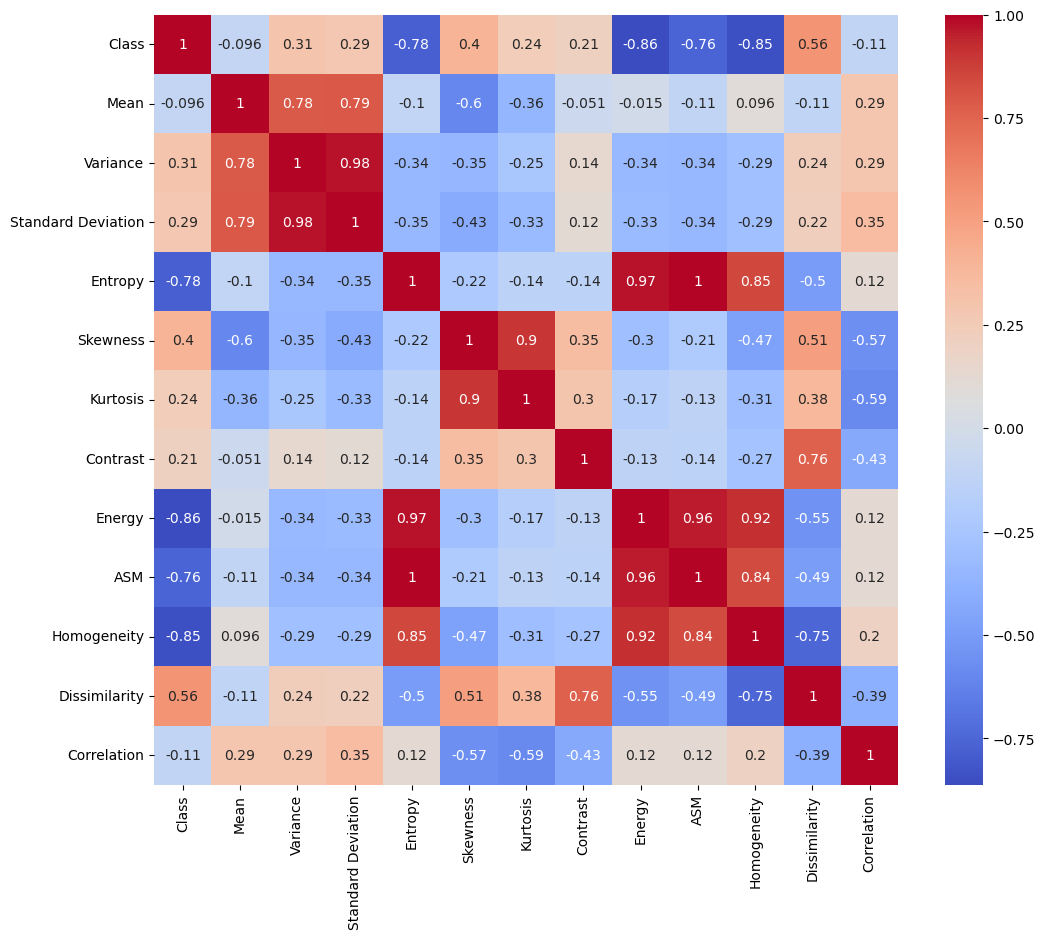

In [7]:
int_cols = df.select_dtypes(include=['int64','float64']).columns
int_df = df[int_cols]
corr_matrix = int_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Data Preparation
Split the data into input (X) and output (y) variables.

In [8]:
X = df.drop(columns=["Class","Image"])
y = df["Class"]

Then split the data into training and testing sets using the train_test_split() method.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

Also define the number of folds for cross-validation and create a k-fold cross-validation object

In [10]:
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=64)

### Building Logistic Regression Model
Build a logistic regression model using scikit-learn. Create a pipeline with a StandardScaler and a logistic regression model. 
Then define hyperparameters to search over and create a grid search object with k-fold cross-validation.
Fit the grid search object to the training data and create a new model with the best hyperparameters.
Fit the new model to the training data and use it to make predictions on the test data. Finally, evaluate the model using a classification report and plot the confusion matrix using seaborn.

In [14]:
lr_pipeline = make_pipeline(StandardScaler(),LogisticRegression(random_state=160,max_iter=1000))
lr_params = {'logisticregression__C': [1, 10, 100],
             
             }

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=kf, scoring='accuracy')
lr_grid.fit(X_train, y_train)
best_params = lr_grid.best_params_

lr_model = make_pipeline(StandardScaler(),LogisticRegression(multi_class='ovr',solver='lbfgs',C=best_params['logisticregression__C'], random_state=160,max_iter=1000))
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       195
           1       0.99      0.97      0.98       182

    accuracy                           0.98       377
   macro avg       0.98      0.98      0.98       377
weighted avg       0.98      0.98      0.98       377



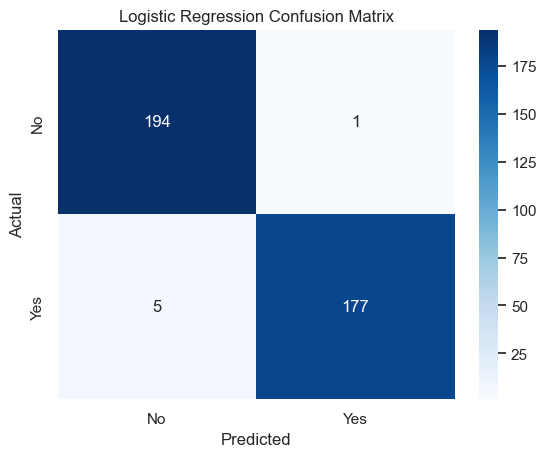

In [15]:
sns.set_theme()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Building Random Forest Classifier Model
Create a pipeline with a StandardScaler and a random forest classifier model. Then define hyperparameters to search over and create a grid search object with k-fold cross-validation. Fit the grid search object to the training data and get the best model from the grid search. We use the best model to make predictions on the test data, evaluate the model using a classification report, and plot theconfusion matrix using seaborn.

In [16]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=160))
rf_params = {
             'randomforestclassifier__criterion' :['gini', 'entropy'],
             'randomforestclassifier__max_features': ['sqrt', 'log2'],
             'randomforestclassifier__max_depth' : [6,7,8],}
rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       195
           1       1.00      0.98      0.99       182

    accuracy                           0.99       377
   macro avg       0.99      0.99      0.99       377
weighted avg       0.99      0.99      0.99       377



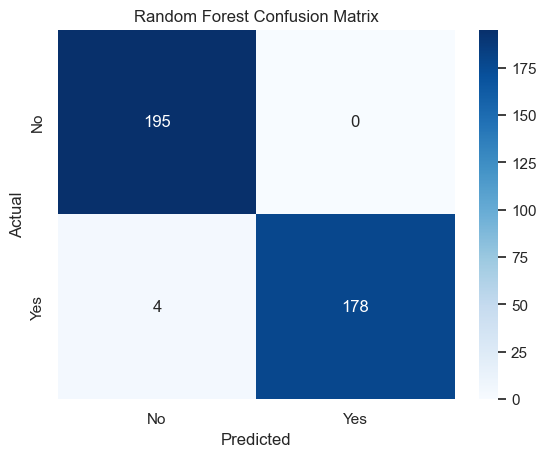

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

### Conclusion
In this analysis, we used logistic regression and random forest classifier models to classify tumors based on their characteristics. Evaluated the performance of these models using classification reports and confusion matrices. The results can help in the diagnosis and treatment of tumors in patients.